In [177]:
import pyodbc
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
from functools import reduce

import itertools 
from itertools import combinations

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
print(os.getcwd())

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\usxz010\OneDrive - Aimia Inc\Desktop\Store similarity


In [178]:
seg_table = pd.read_excel('Similar store analysis_1.xlsx', sheet_name="seg_table")
prod_table = pd.read_excel('Similar store analysis_1.xlsx', sheet_name="prod_table")
dep_table = pd.read_excel('Similar store analysis_1.xlsx', sheet_name="dep_table")
country_table = pd.read_excel('Similar store analysis_1.xlsx', sheet_name="country_table")
overview = pd.read_excel('Similar store analysis_1.xlsx', sheet_name="overview")

In [179]:
segments=seg_table.groupby(['time_period', 'store_id','seg_id']).sum().unstack().reset_index().fillna(0)

department=dep_table.groupby(['time_period', 'store_id','dep']).sum().unstack().reset_index().fillna(0)

country=country_table.groupby(['time_period', 'store_id','country']).sum().unstack().reset_index().fillna(0)

In [180]:
segments

time_period store_id seg_members                                  \
seg_id                                1       2       3       4       5   
0                1        9      2315.0  2045.0  3946.0  3216.0  1681.0   
1                1       16       205.0   422.0   763.0  1047.0   317.0   
2                1       17        63.0   117.0   138.0   359.0    70.0   
3                1       21      2457.0  2372.0  4078.0  4012.0  1440.0   
4                1       25      1647.0  1630.0  2561.0  4659.0   855.0   
...            ...      ...         ...     ...     ...     ...     ...   
1088             3      894      1462.0   335.0   602.0   851.0   191.0   
1089             3      895      3293.0   722.0  1394.0  1426.0   606.0   
1090             3      896      2534.0   204.0   283.0   311.0   167.0   
1091             3      897       701.0   965.0  1613.0  1794.0   593.0   
1092             3      923       279.0   271.0   403.0   740.0    93.0   

                                                 seg_sales             \
seg_id       6       7       8       9      10           1          2   
0       1911.0  3666.0  5875.0  3400.0  1233.0  2530963.70  1495008.1   
1        428.0   438.0  1265.0   519.0   286.0   496390.60   670353.8   
2        183.0   111.0   262.0   140.0    70.0    75053.10    90421.8   
3       2229.0  3830.0  6709.0  4317.0  1118.0  2295163.70  1716023.0   
4       1709.0  3759.0  4736.0  3811.0  1178.0  1414578.30  1315699.3   
...        ...     ...     ...     ...     ...         ...        ...   
1088    1363.0   770.0  1082.0   726.0   162.0   848754.70   112766.4   
1089    1083.0  2110.0  1977.0  1235.0   413.0  2711755.38   352397.5   
1090     279.0   942.0   415.0   237.0   207.0  1634197.98    67277.5   
1091    1065.0   997.0  3100.0  1891.0   416.0   566136.20   765318.2   
1092     336.0   441.0   944.0   761.0   132.0   179332.20   184074.8   

                                                                           \
seg_id          3          4         5           6           7          8   
0       2009853.6  1478669.4  705764.8  1338175.90  2765918.50  2227421.7   
1        864735.3  1134179.7  227509.1   742659.20   595896.60  1055365.6   
2         96351.3   202179.0   40094.8   174563.90   111908.20   130830.6   
3       1505973.6  1906582.3  451360.4  1198168.70  2489583.40  2203650.0   
4       1007192.9  2777001.2  282578.4   847429.00  2576867.50  1498359.8   
...           ...        ...       ...         ...         ...        ...   
1088     102168.1   149911.2   32103.9   503330.02   259481.60   165350.2   
1089     473129.7   488825.9  197045.3   533270.60  1550119.58   578307.4   
1090      68503.3    52296.8   46102.6   125523.10   403162.20    76721.7   
1091     704615.8   856644.2  225222.8   664612.30   554864.10  1183451.8   
1092     121603.3   221598.6   22959.6   146544.60   245140.80   250199.1   

                              seg_visits                                    \
seg_id           9         10          1       2        3        4       5   
0       2068685.60   520803.5     7800.0  5710.0  11509.0   9247.0  4752.0   
1        663276.70    88480.4     1861.0  2760.0   5627.0   7710.0  1943.0   
2        145833.00   433338.4      252.0   377.0    490.0   1226.0   208.0   
3       2753840.10   576519.4     6766.0  5534.0   9154.0  10129.0  3286.0   
4       2858571.74  1083762.2     3465.0  3912.0   6015.0  11570.0  2033.0   
...            ...        ...        ...     ...      ...      ...     ...   
1088     160839.70    56091.6     2574.0   466.0    728.0   1139.0   244.0   
1089     616482.30   495528.6     6208.0  1370.0   2612.0   2826.0  1053.0   
1090      88123.10   196665.3     3736.0   267.0    396.0    412.0   228.0   
1091    1487607.20   704355.5     1894.0  2785.0   4162.0   4757.0  1620.0   
1092     345798.20   505931.3      524.0   557.0    741.0   1299.0   196.0   

                                                  seg_units     

In [181]:
overview.head()
prod_table.head()

,time_period,store_id,members,member_sales,member_visits,member_units,non_member_sales,non_mem_visits,non_member_units,total_sales,total_visit,total_units
0,1,9,29289,17141264.80,84937,252026,9703302.7,68498,151390,26844567.50,153434,403416
1,1,16,5691,6538847.00,38765,112254,3939984.7,32606,66652,10478831.70,71370,178906
2,1,17,1514,1500574.10,5637,32978,1316319.6,10000,22161,2816893.70,15636,55139
3,1,21,32563,17096864.60,78612,239499,10789340.8,75144,170611,27886205.40,153755,410110
4,1,25,26546,15662040.34,60148,217998,27569445.4,137359,395731,43231485.74,197506,613729


,time_period,store_id,no_sku,no_dep,no_cat,ob_sku
0,1,9,5091,18,48,42687
1,1,16,5259,18,51,24396
2,1,17,3130,17,41,3933
3,1,21,6698,18,52,39470
4,1,25,6267,18,47,28396


In [5]:

import functools

sub_dfs = [segments, country, department,prod_table,overview]
sub_df_merge = functools.reduce(lambda left,right: pd.merge(left,right,left_on=['time_period','store_id'],right_on=['time_period','store_id']), sub_dfs)

sub_df_merge

#country.merge(department, how='left', on=['time_period','store_id'])

C:\Users\usxz010\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\usxz010\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,time_period,store_id,"(time_period, )","(store_id, )","(seg_members, 1)","(seg_members, 2)","(seg_members, 3)","(seg_members, 4)","(seg_members, 5)","(seg_members, 6)","(seg_members, 7)","(seg_members, 8)","(seg_members, 9)","(seg_members, 10)","(seg_sales, 1)","(seg_sales, 2)","(seg_sales, 3)","(seg_sales, 4)","(seg_sales, 5)","(seg_sales, 6)","(seg_sales, 7)","(seg_sales, 8)","(seg_sales, 9)","(seg_sales, 10)","(seg_visits, 1)","(seg_visits, 2)","(seg_visits, 3)","(seg_visits, 4)","(seg_visits, 5)","(seg_visits, 6)","(seg_visits, 7)","(seg_visits, 8)","(seg_visits, 9)","(seg_visits, 10)","(seg_units, 1)","(seg_units, 2)","(seg_units, 3)","(seg_units, 4)","(seg_units, 5)","(seg_units, 6)","(seg_units, 7)","(seg_units, 8)","(seg_units, 9)","(seg_units, 10)","(members, CN)","(members, HK)","(members, MO)","(members, OTHERS)","(members, Total)","(member_sales, CN)","(member_sales, HK)","(member_sales, MO)","(member_sales, OTHERS)","(member_sales, Total)","(member_visits, CN)","(member_visits, HK)","(member_visits, MO)","(member_visits, OTHERS)","(member_visits, Total)","(member_units, CN)","(member_units, HK)","(member_units, MO)","(member_units, OTHERS)","(member_units, Total)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH CARE)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, OTHER)","(no_sku, PAPER GOODS)","(no_sku, PC-FREE GIFT)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, APPAREL)","(dep_members, BABY NEEDS)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY CARE)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, CLEANING)","(dep_members, CONFECTIONERY)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, GIFT)","(dep_members, HEALTH CARE)","(dep_members, HEALTH SUPPLEMENT-FREE GIFT)","(dep_members, KITCHEN AND HOUSEWARE)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, OTHER)","(dep_members, PAPER GOODS)","(dep_members, PC-FREE GIFT)","(dep_members, PERSONAL CARE)","(dep_members, RX - FREE GIFT)","(dep_members, SERVICES)","(dep_members, SNACK FOODS)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_members, STATIONARY)","(dep_members, TRAVELLING)","(dep_sales, APPAREL)","(dep_sales, BABY NEEDS)","(dep_sales, BABY-FREE GIFT)","(dep_sales, BEAUTY CARE)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BEVERAGE)","(dep_sales, BISCUITS)","(dep_sales, CLEANING)","(dep_sales, CONFECTIONERY)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, GIFT)","(dep_sales, HEALTH CARE)","(dep_sales, HEALTH SUPPLEMENT-FREE GIFT)","(dep_sales, KITCHEN AND HOUSEWARE)","(dep_sales, LAUNDRY)","(dep_sales, OTC-FREE GIFT)","(dep_sales, OTHER)","(dep_sales, PAPER GOODS)","(dep_sales, PC-FREE GIFT)","(dep_sales, PERSONAL CARE)","(dep_sales, RX - FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SNACK FOODS)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_sales, TRAVELLING)","(dep_visits, APPAREL)","(dep_visits, BABY NEEDS)","(dep_visits, BABY-FREE GIFT)","(dep_visits, BEAUTY CARE)","(dep_visits, BEAUTY-FREE GIFT)","(dep_visits, BEVERAGE)","(dep_visits, BISCUITS)","(dep_visits, CLEANING)","(dep_visits, CONFECTIONERY)","(dep_visits, ELECTRICAL)","(dep_visits, FOOD-FREE GIFT)","(dep_visits, GIFT)","(dep_visits, HEALTH CARE)","(dep_visits, HEALTH SUPPLEMENT-FREE GIFT)","(dep_visits, KITCHEN AND HOUSEWARE)","(dep_visits, LAUNDRY)","(dep_visits, OTC-FREE GIFT)","(dep_visits, OTHER)","(dep_visits, PAPER GOODS)","(dep_visits, PC-FREE GIFT)","(dep_visits, PERSO

In [6]:
#drop more than 80% correlated columns
corr_matrix=sub_df_merge.corr().abs()
corr_matrix.head()

,time_period,store_id,"(time_period, )","(store_id, )","(seg_members, 1)","(seg_members, 2)","(seg_members, 3)","(seg_members, 4)","(seg_members, 5)","(seg_members, 6)","(seg_members, 7)","(seg_members, 8)","(seg_members, 9)","(seg_members, 10)","(seg_sales, 1)","(seg_sales, 2)","(seg_sales, 3)","(seg_sales, 4)","(seg_sales, 5)","(seg_sales, 6)","(seg_sales, 7)","(seg_sales, 8)","(seg_sales, 9)","(seg_sales, 10)","(seg_visits, 1)","(seg_visits, 2)","(seg_visits, 3)","(seg_visits, 4)","(seg_visits, 5)","(seg_visits, 6)","(seg_visits, 7)","(seg_visits, 8)","(seg_visits, 9)","(seg_visits, 10)","(seg_units, 1)","(seg_units, 2)","(seg_units, 3)","(seg_units, 4)","(seg_units, 5)","(seg_units, 6)","(seg_units, 7)","(seg_units, 8)","(seg_units, 9)","(seg_units, 10)","(members, CN)","(members, HK)","(members, MO)","(members, OTHERS)","(members, Total)","(member_sales, CN)","(member_sales, HK)","(member_sales, MO)","(member_sales, OTHERS)","(member_sales, Total)","(member_visits, CN)","(member_visits, HK)","(member_visits, MO)","(member_visits, OTHERS)","(member_visits, Total)","(member_units, CN)","(member_units, HK)","(member_units, MO)","(member_units, OTHERS)","(member_units, Total)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH CARE)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, OTHER)","(no_sku, PAPER GOODS)","(no_sku, PC-FREE GIFT)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, APPAREL)","(dep_members, BABY NEEDS)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY CARE)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, CLEANING)","(dep_members, CONFECTIONERY)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, GIFT)","(dep_members, HEALTH CARE)","(dep_members, HEALTH SUPPLEMENT-FREE GIFT)","(dep_members, KITCHEN AND HOUSEWARE)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, OTHER)","(dep_members, PAPER GOODS)","(dep_members, PC-FREE GIFT)","(dep_members, PERSONAL CARE)","(dep_members, RX - FREE GIFT)","(dep_members, SERVICES)","(dep_members, SNACK FOODS)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_members, STATIONARY)","(dep_members, TRAVELLING)","(dep_sales, APPAREL)","(dep_sales, BABY NEEDS)","(dep_sales, BABY-FREE GIFT)","(dep_sales, BEAUTY CARE)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BEVERAGE)","(dep_sales, BISCUITS)","(dep_sales, CLEANING)","(dep_sales, CONFECTIONERY)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, GIFT)","(dep_sales, HEALTH CARE)","(dep_sales, HEALTH SUPPLEMENT-FREE GIFT)","(dep_sales, KITCHEN AND HOUSEWARE)","(dep_sales, LAUNDRY)","(dep_sales, OTC-FREE GIFT)","(dep_sales, OTHER)","(dep_sales, PAPER GOODS)","(dep_sales, PC-FREE GIFT)","(dep_sales, PERSONAL CARE)","(dep_sales, RX - FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SNACK FOODS)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_sales, TRAVELLING)","(dep_visits, APPAREL)","(dep_visits, BABY NEEDS)","(dep_visits, BABY-FREE GIFT)","(dep_visits, BEAUTY CARE)","(dep_visits, BEAUTY-FREE GIFT)","(dep_visits, BEVERAGE)","(dep_visits, BISCUITS)","(dep_visits, CLEANING)","(dep_visits, CONFECTIONERY)","(dep_visits, ELECTRICAL)","(dep_visits, FOOD-FREE GIFT)","(dep_visits, GIFT)","(dep_visits, HEALTH CARE)","(dep_visits, HEALTH SUPPLEMENT-FREE GIFT)","(dep_visits, KITCHEN AND HOUSEWARE)","(dep_visits, LAUNDRY)","(dep_visits, OTC-FREE GIFT)","(dep_visits, OTHER)","(dep_visits, PAPER GOODS)","(dep_visits, PC-FREE GIFT)","(dep_visits, PERSO

In [7]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop=[col for col in upper.columns if any(upper[col]>0.85)]

dfs=sub_df_merge.drop(to_drop,axis=1)
dfs

,time_period,store_id,"(seg_members, 1)","(seg_members, 2)","(seg_members, 6)","(seg_members, 10)","(seg_sales, 6)","(seg_sales, 10)","(members, MO)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, PAPER GOODS)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, PC-FREE GIFT)","(dep_members, RX - FREE GIFT)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BISCUITS)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_units, STATIONARY)",no_dep,non_member_sales
0,1,9,2315.0,2045.0,1911.0,1233.0,1338175.90,520803.5,26.0,15.0,286.0,0.0,1266.0,0.0,6.0,46.0,2.0,204.0,17.0,1.0,50.0,0.0,0.0,0.0,0.0,37.0,1638.0,2.0,15.0,42.0,28.0,0.0,0.0,0.0,0.0,261.0,1626.0,161.0,1.0,0.0,0.0,0.0,13.0,801.0,0.0,102864.00,7185.7,2.0,111498.5,69335.80,0.0,0.0,18,9703302.7
1,1,16,205.0,422.0,428.0,286.0,742659.20,88480.4,6.0,18.0,373.0,0.0,1338.0,0.0,7.0,63.0,4.0,219.0,8.0,0.0,48.0,0.0,0.0,4.0,0.0,49.0,1656.0,2.0,13.0,53.0,27.0,0.0,0.0,0.0,0.0,55.0,662.0,98.0,0.0,22.0,0.0,0.0,5.0,250.0,0.0,39206.76,5004.7,0.0,55730.5,24758.70,0.0,0.0,18,3939984.7
2,1,17,63.0,117.0,183.0,70.0,174563.90,433338.4,1.0,14.0,178.0,0.0,628.0,0.0,6.0,34.0,2.0,145.0,19.0,0.0,45.0,0.0,0.0,0.0,0.0,34.0,1197.0,1.0,7.0,32.0,5.0,0.0,0.0,0.0,0.0,12.0,144.0,69.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,27786.50,3088.8,0.0,11633.5,252.30,0.0,0.0,17,1316319.6
3,1,21,2457.0,2372.0,2229.0,1118.0,1198168.70,576519.4,37.0,17.0,399.0,0.0,1859.0,1.0,6.0,66.0,5.0,219.0,8.0,0.0,47.0,0.0,0.0,0.0,0.0,47.0,1773.0,2.0,13.0,54.0,29.0,0.0,0.0,0.0,1.0,245.0,1467.0,98.0,0.0,0.0,0.0,0.0,13.0,569.0,238.0,73534.83,5299.1,0.0,87575.0,48440.40,0.0,0.0,18,10789340.8
4,1,25,1647.0,1630.0,1709.0,1178.0,847429.00,1083762.2,89.0,20.0,273.0,0.0,1664.0,0.0,25.0,48.0,2.0,201.0,7.0,0.0,46.0,0.0,0.0,4.0,0.0,38.0,1533.0,2.0,13.0,43.0,22.0,0.0,0.0,0.0,0.0,574.0,1017.0,117.0,0.0,40.0,0.0,0.0,15.0,305.0,0.0,35272.58,6837.4,0.0,72314.5,16758.10,0.0,0.0,18,27569445.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,3,894,1462.0,335.0,1363.0,162.0,503330.02,56091.6,11.0,9.0,882.0,1.0,514.0,1.0,5.0,6.0,10.0,40.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,36.0,133.0,0.0,7.0,30.0,10.0,0.0,0.0,2.0,1.0,170.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,-0.1,3354.60,0.0,0.0,13952.5,6807.00,0.0,0.0,17,2365417.8
1089,3,895,3293.0,722.0,1083.0,413.0,533270.60,495528.6,4.0,12.0,754.0,0.0,1508.0,2.0,4.0,30.0,13.0,123.0,5.0,0.0,35.0,0.0,0.0,0.0,0.0,53.0,1345.0,1.0,26.0,63.0,23.0,0.0,0.0,0.0,3.0,115.0,655.0,19.0,0.0,0.0,0.0,25.0,3.0,717.0,-2.6,88200.05,1053.2,0.0,91512.5,43218.35,0.0,0.0,19,6660436.9
1090,3,896,2534.0,204.0,279.0,207.0,125523.10,196665.3,1.0,11.0,224.0,0.0,496.0,1.0,3.0,12.0,6.0,87.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,41.0,633.0,1.0,10.0,18.0,21.0,0.0,0.0,0.0,1.0,10.0,125.0,0.0,0.0,0.0,0.0,4.0,1.0,195.0,-0.1,18155.20,0.0,0.0,7993.0,16144.00,0.0,0.0,18,2982273.3
1091,3,897,701.0,965.0,1065.0,416.0,664612.30,704355.5,5.0,13.0,256.0,0.0,1322.0,3.0,6.0,31.0,22.0,154.0,10.0,0.0,32.0,0.0,0.0,0.0,0.0,48.0,1454.0,2.0,26.0,58.0,22.0,0.0,0.0,0.0,4.0,107

In [ ]:
dfs.describe()

In [161]:
# using only Spending_Score and income variable for easy visualisation
H1_2019=dfs[dfs.time_period==1]
H2_2019=dfs[dfs.time_period==2]
ytd_2020=dfs[dfs.time_period==3]

In [162]:
def df_transformation(df):
    X = df.iloc[:, 2:].values
    scaler = MinMaxScaler()
    X_scaled = X#scaler.fit_transform(X)
    return X_scaled

In [163]:
def kmeans(df):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df_transformation(df))
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [164]:
def km_predict(df, n):
    km = KMeans(n_clusters=n)
    km = km.fit(df_transformation(df))
    y_kmeans = km.predict(df_transformation(df))
    df['cluster']=y_kmeans
    return df

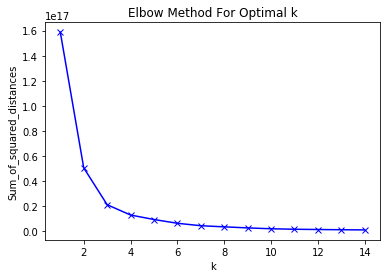

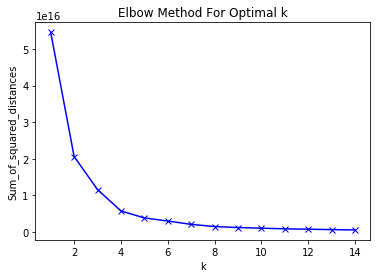

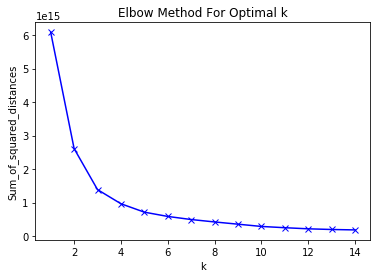

In [165]:
kmeans(H1_2019)
kmeans(H2_2019)
kmeans(ytd_2020)

In [166]:
h1=km_predict(H1_2019,4)
h2=km_predict(H2_2019,4)
ytd20=km_predict(ytd_2020,4)


C:\Users\usxz010\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\usxz010\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\usxz010\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [167]:
combine_df=h1.append(h2)
combine_df=combine_df.append(ytd20)
combine_df

,time_period,store_id,"(seg_members, 1)","(seg_members, 2)","(seg_members, 6)","(seg_members, 10)","(seg_sales, 6)","(seg_sales, 10)","(members, MO)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, PAPER GOODS)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, PC-FREE GIFT)","(dep_members, RX - FREE GIFT)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BISCUITS)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_units, STATIONARY)",no_dep,non_member_sales,cluster
0,1,9,2315.0,2045.0,1911.0,1233.0,1338175.90,520803.5,26.0,15.0,286.0,0.0,1266.0,0.0,6.0,46.0,2.0,204.0,17.0,1.0,50.0,0.0,0.0,0.0,0.0,37.0,1638.0,2.0,15.0,42.0,28.0,0.0,0.0,0.0,0.0,261.0,1626.0,161.0,1.0,0.0,0.0,0.0,13.0,801.0,0.0,102864.00,7185.7,2.0,111498.5,69335.80,0.0,0.0,18,9703302.7,0
1,1,16,205.0,422.0,428.0,286.0,742659.20,88480.4,6.0,18.0,373.0,0.0,1338.0,0.0,7.0,63.0,4.0,219.0,8.0,0.0,48.0,0.0,0.0,4.0,0.0,49.0,1656.0,2.0,13.0,53.0,27.0,0.0,0.0,0.0,0.0,55.0,662.0,98.0,0.0,22.0,0.0,0.0,5.0,250.0,0.0,39206.76,5004.7,0.0,55730.5,24758.70,0.0,0.0,18,3939984.7,0
2,1,17,63.0,117.0,183.0,70.0,174563.90,433338.4,1.0,14.0,178.0,0.0,628.0,0.0,6.0,34.0,2.0,145.0,19.0,0.0,45.0,0.0,0.0,0.0,0.0,34.0,1197.0,1.0,7.0,32.0,5.0,0.0,0.0,0.0,0.0,12.0,144.0,69.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,27786.50,3088.8,0.0,11633.5,252.30,0.0,0.0,17,1316319.6,0
3,1,21,2457.0,2372.0,2229.0,1118.0,1198168.70,576519.4,37.0,17.0,399.0,0.0,1859.0,1.0,6.0,66.0,5.0,219.0,8.0,0.0,47.0,0.0,0.0,0.0,0.0,47.0,1773.0,2.0,13.0,54.0,29.0,0.0,0.0,0.0,1.0,245.0,1467.0,98.0,0.0,0.0,0.0,0.0,13.0,569.0,238.0,73534.83,5299.1,0.0,87575.0,48440.40,0.0,0.0,18,10789340.8,0
4,1,25,1647.0,1630.0,1709.0,1178.0,847429.00,1083762.2,89.0,20.0,273.0,0.0,1664.0,0.0,25.0,48.0,2.0,201.0,7.0,0.0,46.0,0.0,0.0,4.0,0.0,38.0,1533.0,2.0,13.0,43.0,22.0,0.0,0.0,0.0,0.0,574.0,1017.0,117.0,0.0,40.0,0.0,0.0,15.0,305.0,0.0,35272.58,6837.4,0.0,72314.5,16758.10,0.0,0.0,18,27569445.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,3,894,1462.0,335.0,1363.0,162.0,503330.02,56091.6,11.0,9.0,882.0,1.0,514.0,1.0,5.0,6.0,10.0,40.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,36.0,133.0,0.0,7.0,30.0,10.0,0.0,0.0,2.0,1.0,170.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,-0.1,3354.60,0.0,0.0,13952.5,6807.00,0.0,0.0,17,2365417.8,1
1089,3,895,3293.0,722.0,1083.0,413.0,533270.60,495528.6,4.0,12.0,754.0,0.0,1508.0,2.0,4.0,30.0,13.0,123.0,5.0,0.0,35.0,0.0,0.0,0.0,0.0,53.0,1345.0,1.0,26.0,63.0,23.0,0.0,0.0,0.0,3.0,115.0,655.0,19.0,0.0,0.0,0.0,25.0,3.0,717.0,-2.6,88200.05,1053.2,0.0,91512.5,43218.35,0.0,0.0,19,6660436.9,3
1090,3,896,2534.0,204.0,279.0,207.0,125523.10,196665.3,1.0,11.0,224.0,0.0,496.0,1.0,3.0,12.0,6.0,87.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,41.0,633.0,1.0,10.0,18.0,21.0,0.0,0.0,0.0,1.0,10.0,125.0,0.0,0.0,0.0,0.0,4.0,1.0,195.0,-0.1,18155.20,0.0,0.0,7993.0,16144.00,0.0,0.0,18,2982273.3,1
1091,3,897,701.0,965.0,1065.0,416.0,664612.30,704355.5,5.0,13.0,256.0,0.0,1322.0,3.0,6.0,31.0,22.0,154.0,10.0,0.0,32.0,0.0,0.0,0.0,0.0,48.0,1454.0,2.0,26.0,5

In [168]:
combine_df[combine_df.store_id==430]

,time_period,store_id,"(seg_members, 1)","(seg_members, 2)","(seg_members, 6)","(seg_members, 10)","(seg_sales, 6)","(seg_sales, 10)","(members, MO)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, PAPER GOODS)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, PC-FREE GIFT)","(dep_members, RX - FREE GIFT)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BISCUITS)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_units, STATIONARY)",no_dep,non_member_sales,cluster
208,1,430,5044.0,1090.0,1024.0,1523.0,363532.6,1141060.5,182.0,4.0,104.0,0.0,955.0,0.0,3.0,3.0,0.0,45.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,8.0,318.0,0.0,9.0,9.0,7.0,0.0,0.0,0.0,0.0,185.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,324.0,0.0,33956.70,0.0,0.0,14958.0,27235.0,0.0,0.0,13,54783775.9,2
570,2,430,3307.0,1203.0,1053.0,790.0,347870.5,409886.4,83.0,11.0,212.0,0.0,1134.0,1.0,5.0,15.0,0.0,72.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,18.0,559.0,0.0,10.0,13.0,11.0,0.0,0.0,0.0,1.0,344.0,336.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,-0.4,10599.08,0.0,0.0,24071.5,54841.5,0.0,0.0,14,23032462.5,2
934,3,430,1822.0,1327.0,1171.0,618.0,323475.6,240391.1,35.0,9.0,212.0,0.0,1016.0,1.0,8.0,26.0,14.0,75.0,1.0,0.0,20.0,0.0,0.0,0.0,0.0,35.0,619.0,0.0,10.0,31.0,14.0,0.0,0.0,0.0,1.0,287.0,280.0,6.0,0.0,0.0,0.0,6.0,0.0,271.0,-0.1,20403.40,2793.0,0.0,6032.0,19877.2,0.0,0.0,18,9682190.6,0


In [169]:
store_list_h1=combine_df[(combine_df.cluster==2) & (combine_df.time_period==1)]

store_list_h2=combine_df[(combine_df.cluster==2) & (combine_df.time_period==2)]

store_list_2020=combine_df[(combine_df.cluster==0) & (combine_df.time_period==3)]

In [ ]:
pd.DataFrame(df_transformation(store_list_h1))
#store_list_h1

In [170]:
len(store_list_h1)
len(store_list_h2)
len(store_list_2020)

19

59

59

In [171]:
h1_store_id=store_list_h1.store_id
h2_store_id=store_list_h2[store_list_h2.store_id.isin(h1_store_id)].store_id
store_list_2020=store_list_2020[store_list_2020.store_id.isin(h2_store_id)]
len(store_list_2020)
store_list_2020

7

,time_period,store_id,"(seg_members, 1)","(seg_members, 2)","(seg_members, 6)","(seg_members, 10)","(seg_sales, 6)","(seg_sales, 10)","(members, MO)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, PAPER GOODS)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, PC-FREE GIFT)","(dep_members, RX - FREE GIFT)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BISCUITS)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_units, STATIONARY)",no_dep,non_member_sales,cluster
823,3,227,1242.0,1097.0,1345.0,545.0,568279.8,339649.8,9.0,9.0,199.0,0.0,1172.0,1.0,7.0,29.0,14.0,93.0,3.0,0.0,31.0,0.0,0.0,0.0,0.0,31.0,743.0,0.0,12.0,55.0,15.0,0.0,0.0,0.0,1.0,261.0,356.0,9.0,0.0,0.0,0.0,5.0,0.0,238.0,-0.2,21094.80,3343.8,0.0,54918.0,10620.9,0.0,0.0,18,10694959.7,0
831,3,239,1483.0,1325.0,1153.0,720.0,380601.7,494526.5,28.0,12.0,291.0,0.0,1063.0,1.0,7.0,26.0,12.0,121.0,2.0,1.0,35.0,0.0,0.0,0.0,0.0,44.0,749.0,0.0,27.0,63.0,21.0,0.0,0.0,0.0,2.0,159.0,297.0,7.0,4.0,0.0,0.0,9.0,0.0,212.0,-0.2,27981.40,2393.9,2.5,133904.0,17606.0,0.0,0.0,19,8462319.8,0
849,3,264,1629.0,2070.0,1494.0,953.0,767125.1,2277973.1,34.0,17.0,313.0,0.0,1552.0,1.0,6.0,53.0,13.0,161.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,67.0,1469.0,2.0,28.0,86.0,24.0,0.0,0.0,0.0,3.0,195.0,883.0,23.0,17.0,0.0,0.0,17.0,9.0,358.0,-0.8,42487.68,780.7,9.5,232987.8,31505.1,0.0,0.0,20,13945528.3,0
934,3,430,1822.0,1327.0,1171.0,618.0,323475.6,240391.1,35.0,9.0,212.0,0.0,1016.0,1.0,8.0,26.0,14.0,75.0,1.0,0.0,20.0,0.0,0.0,0.0,0.0,35.0,619.0,0.0,10.0,31.0,14.0,0.0,0.0,0.0,1.0,287.0,280.0,6.0,0.0,0.0,0.0,6.0,0.0,271.0,-0.1,20403.40,2793.0,0.0,6032.0,19877.2,0.0,0.0,18,9682190.6,0
969,3,490,5185.0,947.0,1694.0,551.0,879678.5,2743840.3,6.0,12.0,1011.0,1.0,912.0,0.0,6.0,38.0,17.0,132.0,1.0,0.0,39.0,0.0,0.0,0.0,0.0,60.0,1311.0,0.0,29.0,71.0,24.0,0.0,0.0,1.0,0.0,156.0,858.0,4.0,0.0,0.0,0.0,3.0,0.0,752.0,0.0,60833.90,1576.1,0.0,233020.2,57353.0,0.0,0.0,18,8549721.5,0
1053,3,847,3786.0,870.0,2964.0,392.0,1576352.3,392711.1,13.0,11.0,964.0,1.0,943.0,0.0,6.0,24.0,17.0,90.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,43.0,805.0,0.0,15.0,52.0,22.0,0.0,0.0,4.0,0.0,212.0,345.0,0.0,0.0,0.0,0.0,13.0,0.0,332.0,0.0,23093.40,0.0,0.0,97466.8,23634.2,0.0,0.0,17,8960337.2,0
1060,3,864,964.0,1311.0,1124.0,537.0,492550.3,1293513.1,28.0,18.0,378.0,0.0,1475.0,3.0,7.0,41.0,18.0,183.0,10.0,0.0,39.0,0.0,0.0,0.0,0.0,63.0,1445.0,2.0,28.0,70.0,27.0,0.0,0.0,0.0,7.0,177.0,716.0,115.0,0.0,0.0,0.0,23.0,6.0,335.0,-0.8,30766.45,7435.6,0.0,103345.8,21384.4,0.0,0.0,19,9815711.1,0


In [52]:
overview[overview.store_id.isin(store_list_2020.store_id)]

,time_period,store_id,members,member_sales,member_visits,member_units,non_member_sales,non_mem_visits,non_member_units,total_sales,total_visit,total_units
180,1,376,28083,23125791.84,59376,189349,26244438.2,115810,297720,49370230.04,175185,487069
181,1,378,7782,1926276.90,10506,27743,4250628.1,37782,76674,6176905.00,48287,104417
183,1,381,25593,27199318.40,59800,202903,17589928.6,58572,160750,44789247.00,118371,363653
184,1,384,17668,8865874.70,24448,70219,20326327.3,98004,237658,29192202.00,122451,307877
197,1,409,2328,1263579.14,4189,12359,37320384.3,110672,386166,38583963.44,114860,398525
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,3,840,1476,274973.20,2002,5862,6234465.4,43302,112176,6509438.60,45303,118038
1050,3,842,5777,1297997.10,7653,20337,2490480.2,16098,39015,3788477.30,23750,59352
1055,3,848,1970,1059187.00,2374,9989,4258087.7,11677,46463,5317274.70,14050,56452
1057,3,860,7743,2672997.40,10797,37944,3457751.5,16779,49072,6130748.90,27575,87016


In [183]:
dfs[dfs.store_id==239]
dfs[dfs.store_id==430]

,time_period,store_id,"(seg_members, 1)","(seg_members, 2)","(seg_members, 6)","(seg_members, 10)","(seg_sales, 6)","(seg_sales, 10)","(members, MO)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, PAPER GOODS)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, PC-FREE GIFT)","(dep_members, RX - FREE GIFT)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BISCUITS)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_units, STATIONARY)",no_dep,non_member_sales
100,1,239,4821.0,1418.0,1459.0,1571.0,695021.4,3350482.5,97.0,11.0,268.0,0.0,1175.0,0.0,4.0,10.0,2.0,86.0,0.0,1.0,47.0,0.0,0.0,2.0,0.0,14.0,608.0,0.0,11.0,32.0,12.0,0.0,0.0,0.0,0.0,159.0,246.0,0.0,7.0,11.0,0.0,0.0,0.0,461.0,0.0,44057.60,0.0,4.0,36106.0,38497.1,0.0,0.0,16,52797651.5
464,2,239,2805.0,1302.0,1157.0,733.0,462707.8,924012.7,55.0,13.0,337.0,0.0,1234.0,1.0,8.0,36.0,0.0,130.0,2.0,0.0,52.0,0.0,0.0,2.0,0.0,23.0,850.0,0.0,19.0,38.0,16.0,0.0,0.0,0.0,2.0,294.0,635.0,24.0,0.0,17.0,0.0,1.0,0.0,112.0,-0.4,23628.46,929.7,0.0,87115.1,75401.0,0.0,0.0,17,20151444.5
831,3,239,1483.0,1325.0,1153.0,720.0,380601.7,494526.5,28.0,12.0,291.0,0.0,1063.0,1.0,7.0,26.0,12.0,121.0,2.0,1.0,35.0,0.0,0.0,0.0,0.0,44.0,749.0,0.0,27.0,63.0,21.0,0.0,0.0,0.0,2.0,159.0,297.0,7.0,4.0,0.0,0.0,9.0,0.0,212.0,-0.2,27981.40,2393.9,2.5,133904.0,17606.0,0.0,0.0,19,8462319.8


,time_period,store_id,"(seg_members, 1)","(seg_members, 2)","(seg_members, 6)","(seg_members, 10)","(seg_sales, 6)","(seg_sales, 10)","(members, MO)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, PAPER GOODS)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, PC-FREE GIFT)","(dep_members, RX - FREE GIFT)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BISCUITS)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_units, STATIONARY)",no_dep,non_member_sales
208,1,430,5044.0,1090.0,1024.0,1523.0,363532.6,1141060.5,182.0,4.0,104.0,0.0,955.0,0.0,3.0,3.0,0.0,45.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,8.0,318.0,0.0,9.0,9.0,7.0,0.0,0.0,0.0,0.0,185.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,324.0,0.0,33956.70,0.0,0.0,14958.0,27235.0,0.0,0.0,13,54783775.9
570,2,430,3307.0,1203.0,1053.0,790.0,347870.5,409886.4,83.0,11.0,212.0,0.0,1134.0,1.0,5.0,15.0,0.0,72.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,18.0,559.0,0.0,10.0,13.0,11.0,0.0,0.0,0.0,1.0,344.0,336.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,-0.4,10599.08,0.0,0.0,24071.5,54841.5,0.0,0.0,14,23032462.5
934,3,430,1822.0,1327.0,1171.0,618.0,323475.6,240391.1,35.0,9.0,212.0,0.0,1016.0,1.0,8.0,26.0,14.0,75.0,1.0,0.0,20.0,0.0,0.0,0.0,0.0,35.0,619.0,0.0,10.0,31.0,14.0,0.0,0.0,0.0,1.0,287.0,280.0,6.0,0.0,0.0,0.0,6.0,0.0,271.0,-0.1,20403.40,2793.0,0.0,6032.0,19877.2,0.0,0.0,18,9682190.6


In [ ]:
store_list_2020

### just look at the sales/members/units kpis

In [69]:
h1_overview=overview[overview.time_period==1].set_index('store_id')

h2_overview=overview[overview.time_period==2].set_index('store_id')

ytd_overview=overview[overview.time_period==3].set_index('store_id')


In [70]:
h1_overview

,time_period,members,member_sales,member_visits,member_units,non_member_sales,non_mem_visits,non_member_units,total_sales,total_visit,total_units
store_id,,,,,,,,,,,
9,1,29289,17141264.80,84937,252026,9703302.7,68498,151390,26844567.50,153434,403416
16,1,5691,6538847.00,38765,112254,3939984.7,32606,66652,10478831.70,71370,178906
17,1,1514,1500574.10,5637,32978,1316319.6,10000,22161,2816893.70,15636,55139
21,1,32563,17096864.60,78612,239499,10789340.8,75144,170611,27886205.40,153755,410110
25,1,26546,15662040.34,60148,217998,27569445.4,137359,395731,43231485.74,197506,613729
...,...,...,...,...,...,...,...,...,...,...,...
885,1,5601,4471323.30,23213,70235,1869565.3,15937,32860,6340888.60,39149,103095
890,1,1042,289755.00,1234,4393,146760.2,927,2704,436515.20,2160,7097
893,1,2374,1119952.00,2903,13702,950937.2,3045,12017,2070889.20,5947,25719


In [76]:
import itertools, pandas

def slice(df, threshold):
    df=df.div(df[df.index==430].values)*100-100
    member_list=df.loc[(-threshold<=df.members) & (df.members<=threshold)].index
    member_sales_list=df.loc[(-threshold<=df.member_sales) & (df.member_sales<=threshold)].index
    member_units_list=df.loc[(-threshold<=df.member_units) & (df.member_units<=threshold)].index
    member_visit_list=df.loc[(-threshold<=df.member_visits) & (df.member_visits<=threshold)].index

    ttl_sales_list=df.loc[(-threshold<=df.total_sales) & (df.total_sales<=threshold)].index
    ttl_visits_list=df.loc[(-threshold<=df.total_visit) & (df.total_visit<=threshold)].index
    ttl_units_list=df.loc[(-threshold<=df.total_units) & (df.total_units <=threshold)].index

   # compare_df=pd.DataFrame(list(zip(member_list, member_sales_list,member_units_list,\
   #                                 member_visit_list,ttl_sales_list,ttl_visits_list,ttl_units_list)), 
    #           columns =['member', 'member_sales','member_units', 'member_visit',\
    #                     'ttl_sales','ttl_visits','ttl_units'] 
    
    nest=[member_list, member_sales_list,member_units_list,\
          member_visit_list,ttl_sales_list,ttl_visits_list,ttl_units_list]
    compare_df=pd.DataFrame((_ for _ in itertools.zip_longest(*nest)),columns =['member', 'member_sales','member_units', 'member_visit',\
                         'ttl_sales','ttl_visits','ttl_units'] )
    return compare_df

In [72]:
h1=h1_overview.div(h1_overview[h1_overview.index==430].values)*100-100
member_list=h1.loc[(-5<=h1.members) & (h1.members<=5)].index
member_sales_list=h1.loc[(-5<=h1.member_sales) & (h1.member_sales<=5)].index
member_units_list=h1.loc[(-5<=h1.member_units) & (h1.member_units<=5)].index
member_visit_list=h1.loc[(-5<=h1.member_visits) & (h1.member_visits<=5)].index
ttl_sales_list=h1.loc[(-5<=h1.total_sales) & (h1.total_sales<=5)].index

In [73]:
member_list
member_sales_list
member_units_list
member_visit_list

Int64Index([25, 324, 331, 381, 430, 495, 498, 864], dtype='int64', name='store_id')

Int64Index([65, 180, 208, 211, 314, 430, 456, 495, 534], dtype='int64', name='store_id')

Int64Index([ 51,  98, 115, 191, 204, 206, 231, 337, 363, 430, 444, 455, 471,
            472, 494, 496, 542, 547, 814, 817, 821],
           dtype='int64', name='store_id')

Int64Index([ 79, 144, 210, 224, 246, 256, 325, 334, 340, 354, 411, 430, 446,
            462, 476, 480, 512, 521, 545, 814],
           dtype='int64', name='store_id')

In [74]:
set(member_sales_list) & set(ttl_sales_list)

{430}

In [83]:
set(member_sales_list) & set(ttl_sales_list)

{430}

In [95]:
d1=slice(h1_overview, 10)
d2=slice(h2_overview,10)
d3=slice(ytd_overview,10)

In [96]:
d1
d2

,member,member_sales,member_units,member_visit,ttl_sales,ttl_visits,ttl_units
0,25.0,30.0,51.0,16,143.0,25.0,166.0
1,55.0,65.0,98.0,79,227.0,166.0,239.0
2,81.0,180.0,115.0,139,239.0,227.0,248.0
3,107.0,208.0,191.0,144,248.0,239.0,264.0
4,239.0,211.0,204.0,151,264.0,264.0,284.0
5,250.0,215.0,206.0,154,284.0,273.0,430.0
6,254.0,243.0,209.0,186,415.0,285.0,538.0
7,324.0,276.0,231.0,199,430.0,374.0,NaN
8,331.0,285.0,237.0,210,549.0,430.0,NaN
9,339.0,314.0,252.0,224,NaN,490.0,NaN


,member,member_sales,member_units,member_visit,ttl_sales,ttl_visits,ttl_units
0,27.0,51,26.0,26,27.0,57.0,9.0
1,56.0,64,62.0,64,31.0,87.0,21.0
2,81.0,98,70.0,70,107.0,94.0,31.0
3,87.0,115,80.0,80,116.0,98.0,49.0
4,132.0,141,95.0,95,143.0,105.0,56.0
5,173.0,167,103.0,103,198.0,113.0,87.0
6,198.0,191,149.0,138,227.0,124.0,94.0
7,206.0,204,151.0,146,236.0,141.0,143.0
8,208.0,206,154.0,149,239.0,143.0,172.0
9,227.0,209,158.0,151,278.0,173.0,211.0


In [101]:
from functools import reduce # python 3 only
reduce(np.intersect1d, [d1.member, d2.member, d3.member])

set(d3.member) & set(d3.ttl_sales) & set(d3.member_sales) 

array([ 81., 250., 430., 491., 522., 530., 815.])

{430.0}

In [102]:
overview[overview.store_id==430]
overview[overview.store_id==498]

,time_period,store_id,members,member_sales,member_visits,member_units,non_member_sales,non_mem_visits,non_member_units,total_sales,total_visit,total_units
208,1,430,26154,13696427.0,36307,143847,54783775.9,168044,688073,68480202.9,204350,831920
571,2,430,21568,8249051.2,29076,92678,23032462.5,87722,299709,31281513.7,116797,392387
935,3,430,22266,5872231.5,29826,86307,9682190.6,60287,146954,15554422.1,90112,233261


,time_period,store_id,members,member_sales,member_visits,member_units,non_member_sales,non_mem_visits,non_member_units,total_sales,total_visit,total_units
251,1,498,25555,19642776.2,62769,247819,10756212.1,49950,145805,30398988.3,112718,393624
614,2,498,20863,15021393.2,52322,199569,8416039.2,41478,121841,23437432.4,93799,321410
978,3,498,19906,12170047.8,51974,191523,7062195.3,41486,110011,19232243.1,93459,301534


## Cosine Similarity

In [110]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


H1_2019=H1_2019.iloc[:, 1:].set_index('store_id')

In [112]:
H1_2019

,"(seg_members, 1)","(seg_members, 2)","(seg_members, 6)","(seg_members, 10)","(seg_sales, 6)","(seg_sales, 10)","(members, MO)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, PAPER GOODS)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, PC-FREE GIFT)","(dep_members, RX - FREE GIFT)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BISCUITS)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_units, STATIONARY)",no_dep,non_member_sales,cluster
store_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,2315.0,2045.0,1911.0,1233.0,1338175.9,520803.5,26.0,15.0,286.0,0.0,1266.0,0.0,6.0,46.0,2.0,204.0,17.0,1.0,50.0,0.0,0.0,0.0,0.0,37.0,1638.0,2.0,15.0,42.0,28.0,0.0,0.0,0.0,0.0,261.0,1626.0,161.0,1.0,0.0,0.0,0.0,13.0,801.0,0.0,102864.00,7185.7,2.0,111498.5,69335.8,0.0,0.0,18,9703302.7,4
16,205.0,422.0,428.0,286.0,742659.2,88480.4,6.0,18.0,373.0,0.0,1338.0,0.0,7.0,63.0,4.0,219.0,8.0,0.0,48.0,0.0,0.0,4.0,0.0,49.0,1656.0,2.0,13.0,53.0,27.0,0.0,0.0,0.0,0.0,55.0,662.0,98.0,0.0,22.0,0.0,0.0,5.0,250.0,0.0,39206.76,5004.7,0.0,55730.5,24758.7,0.0,0.0,18,3939984.7,1
17,63.0,117.0,183.0,70.0,174563.9,433338.4,1.0,14.0,178.0,0.0,628.0,0.0,6.0,34.0,2.0,145.0,19.0,0.0,45.0,0.0,0.0,0.0,0.0,34.0,1197.0,1.0,7.0,32.0,5.0,0.0,0.0,0.0,0.0,12.0,144.0,69.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,27786.50,3088.8,0.0,11633.5,252.3,0.0,0.0,17,1316319.6,2
21,2457.0,2372.0,2229.0,1118.0,1198168.7,576519.4,37.0,17.0,399.0,0.0,1859.0,1.0,6.0,66.0,5.0,219.0,8.0,0.0,47.0,0.0,0.0,0.0,0.0,47.0,1773.0,2.0,13.0,54.0,29.0,0.0,0.0,0.0,1.0,245.0,1467.0,98.0,0.0,0.0,0.0,0.0,13.0,569.0,238.0,73534.83,5299.1,0.0,87575.0,48440.4,0.0,0.0,18,10789340.8,4
25,1647.0,1630.0,1709.0,1178.0,847429.0,1083762.2,89.0,20.0,273.0,0.0,1664.0,0.0,25.0,48.0,2.0,201.0,7.0,0.0,46.0,0.0,0.0,4.0,0.0,38.0,1533.0,2.0,13.0,43.0,22.0,0.0,0.0,0.0,0.0,574.0,1017.0,117.0,0.0,40.0,0.0,0.0,15.0,305.0,0.0,35272.58,6837.4,0.0,72314.5,16758.1,0.0,0.0,18,27569445.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,739.0,405.0,516.0,196.0,445607.8,128209.6,3.0,13.0,314.0,0.0,867.0,0.0,5.0,55.0,2.0,145.0,4.0,0.0,24.0,0.0,0.0,0.0,0.0,40.0,1420.0,1.0,11.0,50.0,0.0,0.0,0.0,0.0,0.0,146.0,813.0,18.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,33244.20,782.5,0.0,7298.5,0.0,0.0,0.0,15,1869565.3,2
890,162.0,65.0,137.0,40.0,31135.1,11169.3,1.0,7.0,351.0,0.0,297.0,0.0,2.0,8.0,0.0,61.0,4.0,0.0,11.0,0.0,0.0,0.0,0.0,16.0,406.0,0.0,6.0,21.0,0.0,0.0,0.0,0.0,0.0,26.0,30.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,722.60,252.6,0.0,2295.5,0.0,0.0,0.0,13,146760.2,0
893,604.0,85.0,304.0,174.0,73691.3,175312.0,3.0,10.0,666.0,0.0,453.0,0.0,4.0,38.0,0.0,92.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,26.0,644.0,0.0,8.0,41.0,0.0,0.0,0.0,0.0,0.0,83.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4367.90,0.0,0.0,7540.5,0.0,0.0,0.0,12,950937.2,0


In [146]:
cos_h1=pd.DataFrame(cosine_similarity(H1_2019))
cos_h1.index=H1_2019.index
cos_h1.columns=H1_2019.index


tt=cos_h1[cos_h1.index==430]

tt=tt.rank(1, ascending=False, method='first')


tt.T.to_csv('similar store.csv')
#apply(lambda row: row.nlargest(2).values[-1],axis=1)

In [176]:
dfs[dfs.store_id==239]
dfs[dfs.store_id==430]

,time_period,store_id,"(seg_members, 1)","(seg_members, 2)","(seg_members, 6)","(seg_members, 10)","(seg_sales, 6)","(seg_sales, 10)","(members, MO)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, PAPER GOODS)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, PC-FREE GIFT)","(dep_members, RX - FREE GIFT)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BISCUITS)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_units, STATIONARY)",no_dep,non_member_sales
100,1,239,4821.0,1418.0,1459.0,1571.0,695021.4,3350482.5,97.0,11.0,268.0,0.0,1175.0,0.0,4.0,10.0,2.0,86.0,0.0,1.0,47.0,0.0,0.0,2.0,0.0,14.0,608.0,0.0,11.0,32.0,12.0,0.0,0.0,0.0,0.0,159.0,246.0,0.0,7.0,11.0,0.0,0.0,0.0,461.0,0.0,44057.60,0.0,4.0,36106.0,38497.1,0.0,0.0,16,52797651.5
464,2,239,2805.0,1302.0,1157.0,733.0,462707.8,924012.7,55.0,13.0,337.0,0.0,1234.0,1.0,8.0,36.0,0.0,130.0,2.0,0.0,52.0,0.0,0.0,2.0,0.0,23.0,850.0,0.0,19.0,38.0,16.0,0.0,0.0,0.0,2.0,294.0,635.0,24.0,0.0,17.0,0.0,1.0,0.0,112.0,-0.4,23628.46,929.7,0.0,87115.1,75401.0,0.0,0.0,17,20151444.5
831,3,239,1483.0,1325.0,1153.0,720.0,380601.7,494526.5,28.0,12.0,291.0,0.0,1063.0,1.0,7.0,26.0,12.0,121.0,2.0,1.0,35.0,0.0,0.0,0.0,0.0,44.0,749.0,0.0,27.0,63.0,21.0,0.0,0.0,0.0,2.0,159.0,297.0,7.0,4.0,0.0,0.0,9.0,0.0,212.0,-0.2,27981.40,2393.9,2.5,133904.0,17606.0,0.0,0.0,19,8462319.8


,time_period,store_id,"(seg_members, 1)","(seg_members, 2)","(seg_members, 6)","(seg_members, 10)","(seg_sales, 6)","(seg_sales, 10)","(members, MO)","(no_sku, APPAREL)","(no_sku, BABY NEEDS)","(no_sku, BABY-FREE GIFT)","(no_sku, BEAUTY CARE)","(no_sku, BEAUTY-FREE GIFT)","(no_sku, BEVERAGE)","(no_sku, BISCUITS)","(no_sku, CLEANING)","(no_sku, CONFECTIONERY)","(no_sku, ELECTRICAL)","(no_sku, FOOD-FREE GIFT)","(no_sku, GIFT)","(no_sku, HEALTH SUPPLEMENT-FREE GIFT)","(no_sku, KITCHEN AND HOUSEWARE)","(no_sku, LAUNDRY)","(no_sku, OTC-FREE GIFT)","(no_sku, PAPER GOODS)","(no_sku, PERSONAL CARE)","(no_sku, RX - FREE GIFT)","(no_sku, SERVICES)","(no_sku, SNACK FOODS)","(no_sku, SPECIAL EVENTS-FOOD)","(no_sku, STATIONARY)","(no_sku, TRAVELLING)","(dep_members, BABY-FREE GIFT)","(dep_members, BEAUTY-FREE GIFT)","(dep_members, BEVERAGE)","(dep_members, BISCUITS)","(dep_members, ELECTRICAL)","(dep_members, FOOD-FREE GIFT)","(dep_members, LAUNDRY)","(dep_members, OTC-FREE GIFT)","(dep_members, PC-FREE GIFT)","(dep_members, RX - FREE GIFT)","(dep_members, SPECIAL EVENTS-FOOD)","(dep_sales, BEAUTY-FREE GIFT)","(dep_sales, BISCUITS)","(dep_sales, ELECTRICAL)","(dep_sales, FOOD-FREE GIFT)","(dep_sales, SERVICES)","(dep_sales, SPECIAL EVENTS-FOOD)","(dep_sales, STATIONARY)","(dep_units, STATIONARY)",no_dep,non_member_sales
208,1,430,5044.0,1090.0,1024.0,1523.0,363532.6,1141060.5,182.0,4.0,104.0,0.0,955.0,0.0,3.0,3.0,0.0,45.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,8.0,318.0,0.0,9.0,9.0,7.0,0.0,0.0,0.0,0.0,185.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0,324.0,0.0,33956.70,0.0,0.0,14958.0,27235.0,0.0,0.0,13,54783775.9
570,2,430,3307.0,1203.0,1053.0,790.0,347870.5,409886.4,83.0,11.0,212.0,0.0,1134.0,1.0,5.0,15.0,0.0,72.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,18.0,559.0,0.0,10.0,13.0,11.0,0.0,0.0,0.0,1.0,344.0,336.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,-0.4,10599.08,0.0,0.0,24071.5,54841.5,0.0,0.0,14,23032462.5
934,3,430,1822.0,1327.0,1171.0,618.0,323475.6,240391.1,35.0,9.0,212.0,0.0,1016.0,1.0,8.0,26.0,14.0,75.0,1.0,0.0,20.0,0.0,0.0,0.0,0.0,35.0,619.0,0.0,10.0,31.0,14.0,0.0,0.0,0.0,1.0,287.0,280.0,6.0,0.0,0.0,0.0,6.0,0.0,271.0,-0.1,20403.40,2793.0,0.0,6032.0,19877.2,0.0,0.0,18,9682190.6
